# Skillbox — Мастер-класс. Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

# Домашнее задание
***

Это домашнее задание призвано укрепить ваши знания EDA. Давайте вернёмся к примеру с компанией Kiva. 

Для начала вспомним, чем занимается компания.

#  1. Kiva и её деятельность
***
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva — это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva — **Make a loan, change a life**.

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 

Список заявок, назначений и стран, нуждающихся в финансировании, можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с сельским хозяйством, питанием, здоровьем и гигиеной, розничной торговлей и поддержкой малого бизнеса.


## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva выделила более одного миллиарда долларов двум миллионам заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, выделенных через Kiva, составляет $1,11 млрд
* 97,0% — доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva — женщины
* Кредит Kiva финансируется каждые две минуты

## 1.2. Как работает Kiva
***

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Набор данных от Kiva
***

**kiva_loans** — это набор данных, который содержит большую часть информации о займах:
- id — уникальный идентификатор для кредита;
- funded_amount — сумма, выплаченная Kiva агенту на местах (USD);
- loan_amount — сумма, выплаченная полевым агентом заёмщику (USD);
- sector — сектор использования займа;
- activity — более гранулированная категория;
- use — назначение использования суммы кредита;
- country_code — ISO-код страны страны, в которой был выдан заём;
- country — полное название страны, в которой был выдан кредит;
- posted_time — время, в которое заявка была опубликована на Kiva;
- disbursed_time — время, когда кредитный агент выдал заёмщику сумму;
- funded_time — время, когда заявка полностью финансируется кредиторами;
- term_in_months — срок, на который был выдан кредит, в месяцах;
- lender_count — общее количество кредиторов, которые внесли свой вклад в этот кредит;
- loaner_genders — разделённые запятыми буквы M и F, где каждый экземпляр представляет одного мужчину / одну женщину в группе.

**kiva_mpi_region_locations** — набор данных, содержащий данные о регионах и показатели MPI. Global Multidimensional Poverty Index — глобальный индекс бедности ряда регионов (субнациональных) в мире. Чем больше это значение, тем выше бедность в соответствующем регионе:
- country — страна;
- region — регион в стране;
- world_region — часть света;
- MPI — многомерный индекс бедности;
- geo — координаты (широта, долгота).




# 2. Разведочный анализ данных
***

Для выполнения работы сохраните копию на свой диск, нажав на кнопку «Файл» в верхней панели и выбрав «Сохранить копию на диск».

## Импорт библиотек

In [1]:
# !pip install missingno
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

## Загрузка данных

Для удобства можно загрузить данные в колаб, предварительно их заархивировав, а затем использовать команду `!unzip kiva_loans.csv.zip`.





In [2]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

_________

### Задание 1. Проверьте, что данные загрузились корректно, выведя на экран первые три строчки каждого датасета.

In [3]:
df_kiva_loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [4]:
df_mpi.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754


Отлично! Данные загружены верно. Теперь давайте посмотрим, присутствуют ли в них пропуски. 
### Задание 2. Сделайте визуализацию для проверки наличия пропусков в двух наборах данных 

Используйте метод, показанный в лонгриде:

```
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');
```



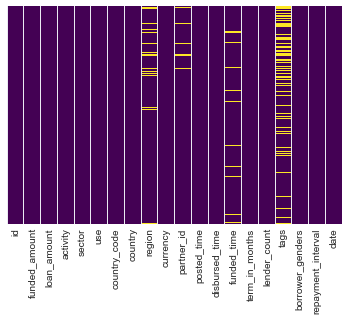

In [5]:
sns.heatmap(df_kiva_loans.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [49]:
# Больше всего пропусков в столбце "tags". Есть также пропуске в столбцах "region", "funded_time".
# Либо сумма еще не собрана, либо не отражена в выгрузке корректно.

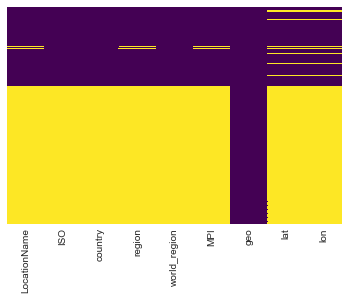

In [6]:
sns.heatmap(df_mpi.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

**Что мы видим?**

В некоторых колонках присутствуют пропуски. 

Помимо визуализаций, наличие пропусков можно отследить с помощью метода ```info()```. 

### Задание 3. Попробуйте применить данный метод к нашим таблицам и сравните число ненулевых значений каждого признака с количеством строк датасетов



In [7]:
df_mpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


In [8]:
df_kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

Помимо числа ненулевых значений каждого столбца, мы сразу можем отследить, к какому типу данных относятся признаки.

Так как пропусков в данных немного, давайте выбросим строки, содержащие NaN.
### Задание 4. С помощью метода ```dropna``` удалите строки с пропусками из датасетов

*Подсказка: чтобы не перезаписывать данные ```(data=data.dropna())```, используйте параметр ```inplace = True```*.

In [9]:
df_kiva_loans.dropna(inplace=True)
df_kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423081 entries, 2 to 671141
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  423081 non-null  int64  
 1   funded_amount       423081 non-null  float64
 2   loan_amount         423081 non-null  float64
 3   activity            423081 non-null  object 
 4   sector              423081 non-null  object 
 5   use                 423081 non-null  object 
 6   country_code        423081 non-null  object 
 7   country             423081 non-null  object 
 8   region              423081 non-null  object 
 9   currency            423081 non-null  object 
 10  partner_id          423081 non-null  float64
 11  posted_time         423081 non-null  object 
 12  disbursed_time      423081 non-null  object 
 13  funded_time         423081 non-null  object 
 14  term_in_months      423081 non-null  float64
 15  lender_count        423081 non-nul

In [10]:
df_mpi.dropna(inplace=True)
df_mpi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892 entries, 0 to 1007
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  892 non-null    object 
 1   ISO           892 non-null    object 
 2   country       892 non-null    object 
 3   region        892 non-null    object 
 4   world_region  892 non-null    object 
 5   MPI           892 non-null    float64
 6   geo           892 non-null    object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 69.7+ KB


Посчитайте количество записей в таблицах после удаления строк, содержащих NaN.

In [11]:
df_kiva_loans.isnull().sum()

id                    0
funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country_code          0
country               0
region                0
currency              0
partner_id            0
posted_time           0
disbursed_time        0
funded_time           0
term_in_months        0
lender_count          0
tags                  0
borrower_genders      0
repayment_interval    0
date                  0
dtype: int64

In [12]:
df_mpi.isnull().sum()

LocationName    0
ISO             0
country         0
region          0
world_region    0
MPI             0
geo             0
lat             0
lon             0
dtype: int64

## Пользователи Kiva

Теперь, когда мы знаем, какие типы признаков присутствуют в данных, когда все пропуски обработаны, настало время перейти к постановке гипотез и их проверке.


### Задание 1. Используя таблицу ```df_kiva_loans```, попробуйте найти связь между сроком кредита (**term_in_months**), количеством кредиторов, которые внесли свой вклад в этот кредит, (**lender_count**) и суммой займа (**loan_amount**). Какие выводы можно сделать из этих данных? 

**Для этого**:

1. Выделите три указанных столбца в отдельную таблицу `df_temp`.
2. Найдите корреляцию между признаками с помощью команды `df_temp.corr()`, сохраните полученные значения в переменную `df_corr`.
3. Используя метод `heatmap` библиотеки `seaborn`, визуализируйте полученный результат, для наглядности задайте параметры `cmap='BrBG', annot=True`.




In [13]:
df_temp = df_kiva_loans[['term_in_months', 'lender_count', 'loan_amount']]
df_temp.head()

,term_in_months,lender_count,loan_amount
2,43.0,6,150.0
6,43.0,8,200.0
7,14.0,8,400.0
8,14.0,19,475.0
12,14.0,16,400.0


In [14]:
df_corr = df_temp.corr()
df_corr

,term_in_months,lender_count,loan_amount
term_in_months,1.000000,0.227787,0.140669
lender_count,0.227787,1.000000,0.884940
loan_amount,0.140669,0.884940,1.000000


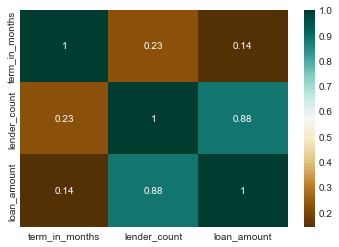

In [15]:
sns.heatmap(df_corr, cmap='BrBG', annot=True)

In [ ]:
# связь количества кредиторов (lender_count) и суммы займов (loan_amount) имеет прямую зависимость.  
# суммы займов (loan_amount) и количество кредиторов (lender_count) слабо зависят от срока кредита (term_in_months).

### Задание 2. Проанализируйте разброс показателя **funded_amount** путём построения визуализации

Иcпользуйте метод `histplot` библиотеки `seaborn`.

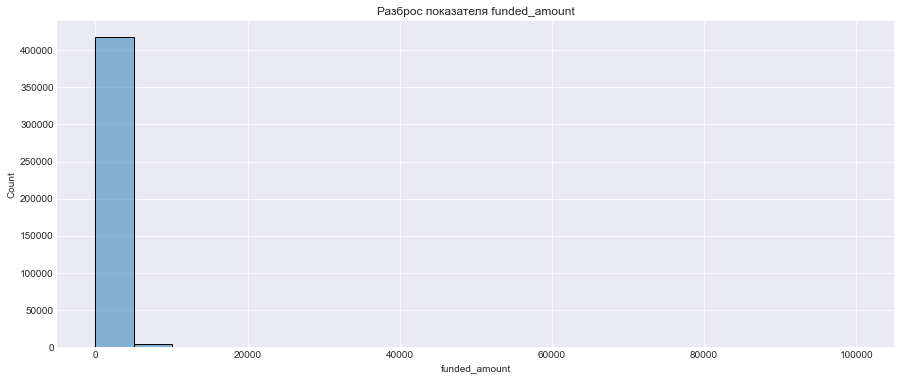

In [16]:
fig, ax = plt.subplots(figsize = (15,6))

sns.histplot(data=df_kiva_loans, x='funded_amount', alpha=0.5, bins=20, ax=ax)

ax.set_title('Разброс показателя funded_amount')

plt.show()

### Задание 3. Изучите несколько займов с большими суммами (> 20 000). Что можно сказать о назначении этих заявок? В каких странах они оформлены? 

Подсказка: для того чтобы выделить объекты с большими суммами, можно воспользоваться командой `df_kiva_loans[df_kiva_loans.loan_amount > 20000]`.

In [46]:
df_kiva_loans[df_kiva_loans['loan_amount'] > 20000]
df_kiva_loans.head(3)
# Большинство займов использовано под "Renewable Energy Products" и "Agriculture", 
# африканскими странами со слабой экономикой.

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,huge_values
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,False
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,...,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01,False
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,False


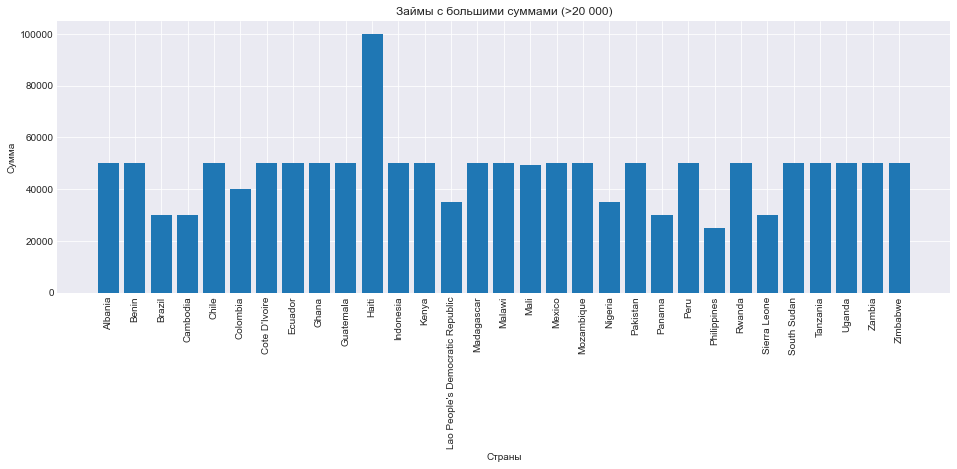

In [4]:
fig, ax = plt.subplots(figsize = (16,5))

graf = df_kiva_loans[df_kiva_loans['loan_amount'] > 20000].sort_values('country')

plt.bar(graf['country'], graf['loan_amount'])

plt.title('Займы с большими суммами (>20 000)')
plt.ylabel('Сумма')
plt.xlabel('Страны')
plt.xticks(rotation=90)

plt.show()

In [42]:
#Преобладают займы с суммой $50000.
#Самая большая сумма займов на Haiti ($100000). 

## Многомерный уровень бедности

### Задание 1. Найдите топ-5 регионов по среднему уровню бедности. Для этого сгруппируйте данные таблицы ```df_mpi``` по параметру **region** и найдите среднее значение **MPI** по группам

*Подсказка: для сортировки данных типа ```Series`` от большего значения к меньшему` , используйте метод ```sort_values``` с параметром `ascending = False`*.

In [24]:
df_mpi.sort_values(['region'], ascending = False).agg('MPI')
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


### Задание 2. Постройте диаграму показателя **MPI** (многомерный индекс бедности) в разных странах

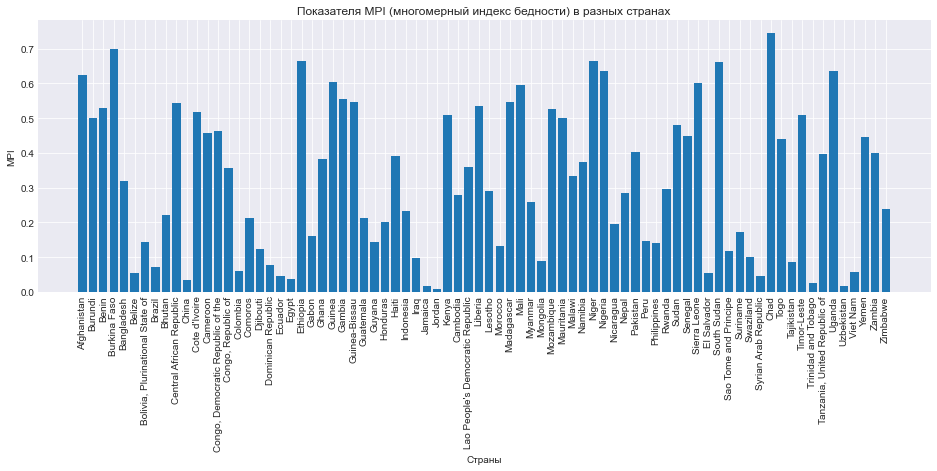

In [25]:
fig, ax = plt.subplots(figsize = (16,5))

plt.bar(df_mpi['country'], df_mpi['MPI'])

plt.title('Показателя MPI (многомерный индекс бедности) в разных странах')
plt.ylabel('MPI')
plt.xlabel('Страны')
plt.xticks(rotation=90)

plt.show()

In [5]:
# Выводы:
# - в странах с высоким MPI (> 0.4) люди берут небольшие займы на сравнительно короткие сроки. 
# - присутсвует наличие небольших по суммам и коротких по срокам займов.
# - большое количество заявок в сырьевых, непроизводственных секторах и сферах услуг.
# - большое число заявок на удовлетворение базовых потребностей в ряде стран мира.
# - низкое проникновение платформы "Kiva" в ряде регионов (Индия, Пакистан).
# - длительное ожидание заявок с небольшими суммами.
# - топ-5 регионов по среднему уровню бедности находятся в Южной Азии.